# Dataset 4

## https://archive.ics.uci.edu/dataset/301/parkinson+speech+dataset+with+multiple+types+of+sound+recordings

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../Dataframes/dataset4.csv')
cols = ['subject_id', 'jitter_local', 'jitter_local_absolute', 'jitter_rap', 'jitter_ppq5', 'jitter_ddp', 'shimmer_local',
        'shimmer_local_db', 'shimmer_apq3', 'shimmer_apq5', 'shimmer_apq11', 'shimmer_dda', 'ac', 'nth', 'htn', 'median_pitch',
        'mean_pitch', 'standard_deviation', 'minimum_pitch', 'maximum_pitch', 'number_of_pulses', 'number_of_periods', 'mean_period',
        'standard_deviation_of_period', 'fraction_of_locally_unvoiced_frames', 'number_of_voice_breaks', 'degree_of_voice_breaks',
        'updrs', 'class_information']
data.columns = cols
data.head()
data.head()

,subject_id,jitter_local,jitter_local_absolute,jitter_rap,jitter_ppq5,jitter_ddp,shimmer_local,shimmer_local_db,shimmer_apq3,shimmer_apq5,...,maximum_pitch,number_of_pulses,number_of_periods,mean_period,standard_deviation_of_period,fraction_of_locally_unvoiced_frames,number_of_voice_breaks,degree_of_voice_breaks,updrs,class_information
0,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1.0
1,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1.0
2,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23,1.0
3,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23,1.0
4,1,2.470,0.000126,1.358,1.341,4.075,10.696,1.256,5.262,7.076,...,202.812,74,73,0.005118,0.000187,23.214,0,0.000,23,1.0


In [3]:
data.shape

(1207, 29)

In [4]:
data.fillna(0, inplace = True) #Infered form a research paper based on the dataset

[]

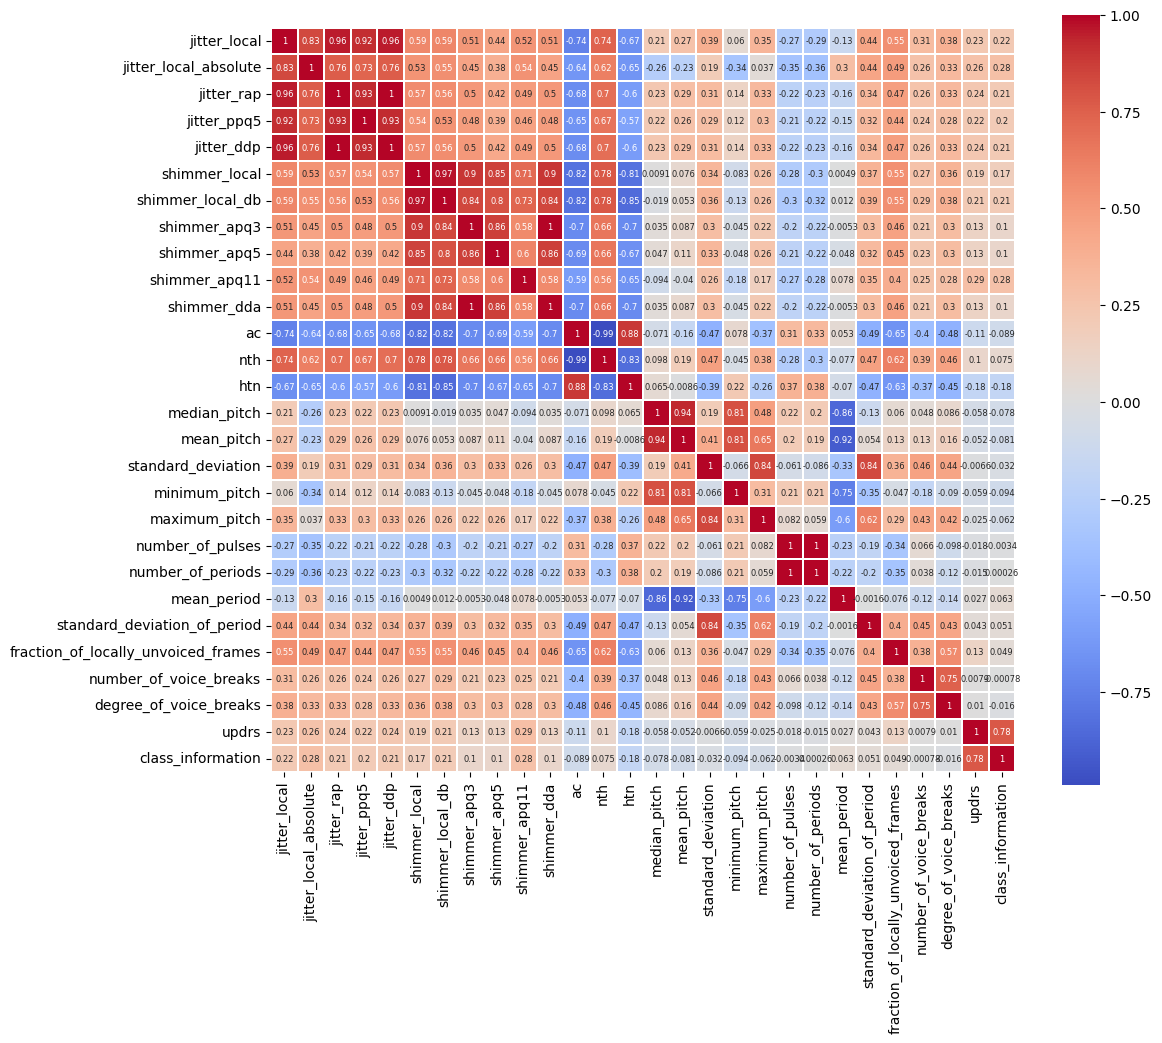

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data.drop(['subject_id'], axis = 1).corr()

plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, cmap = 'coolwarm', square=True, linewidths=0.1, annot=True, annot_kws={"size": 6})
plt.plot()

## XGBoost

In [5]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
data4 = data.copy()
data4 = data4.drop(['subject_id'], axis = 1)

In [7]:
X = data4.drop(['class_information'], axis = 1)
y = data4['class_information']

X_train, X_test, y_train, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 45)

XGB_classifier = XGBClassifier(random_state=45)

XGB_classifier.fit(X_train, y_train)

y_pred1 = XGB_classifier.predict(X_test)

accuracy = accuracy_score(y_test1, y_pred1)
print(f'Accuracy of the XGBoost Classifier: {accuracy:.2f}')

Accuracy of the XGBoost Classifier: 1.00


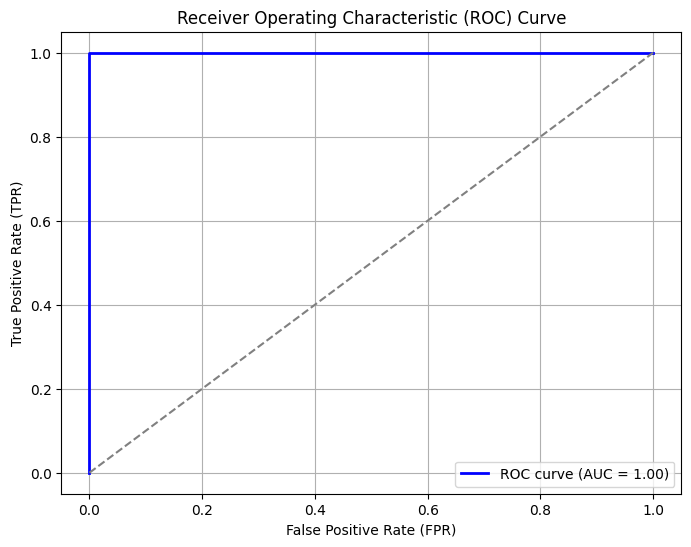

In [8]:
fpr, tpr, thresholds = roc_curve(y_test1, y_pred1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


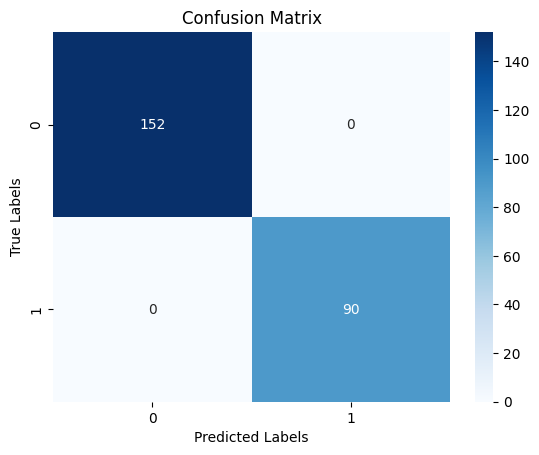

Confusion Matrix:
 [[152   0]
 [  0  90]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       152
         1.0       1.00      1.00      1.00        90

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



In [9]:
conf_matrix = confusion_matrix(y_test1, y_pred1)


sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
class_report = classification_report(y_test1, y_pred1)
print("Classification Report:\n", class_report)

<Figure size 3000x3000 with 0 Axes>

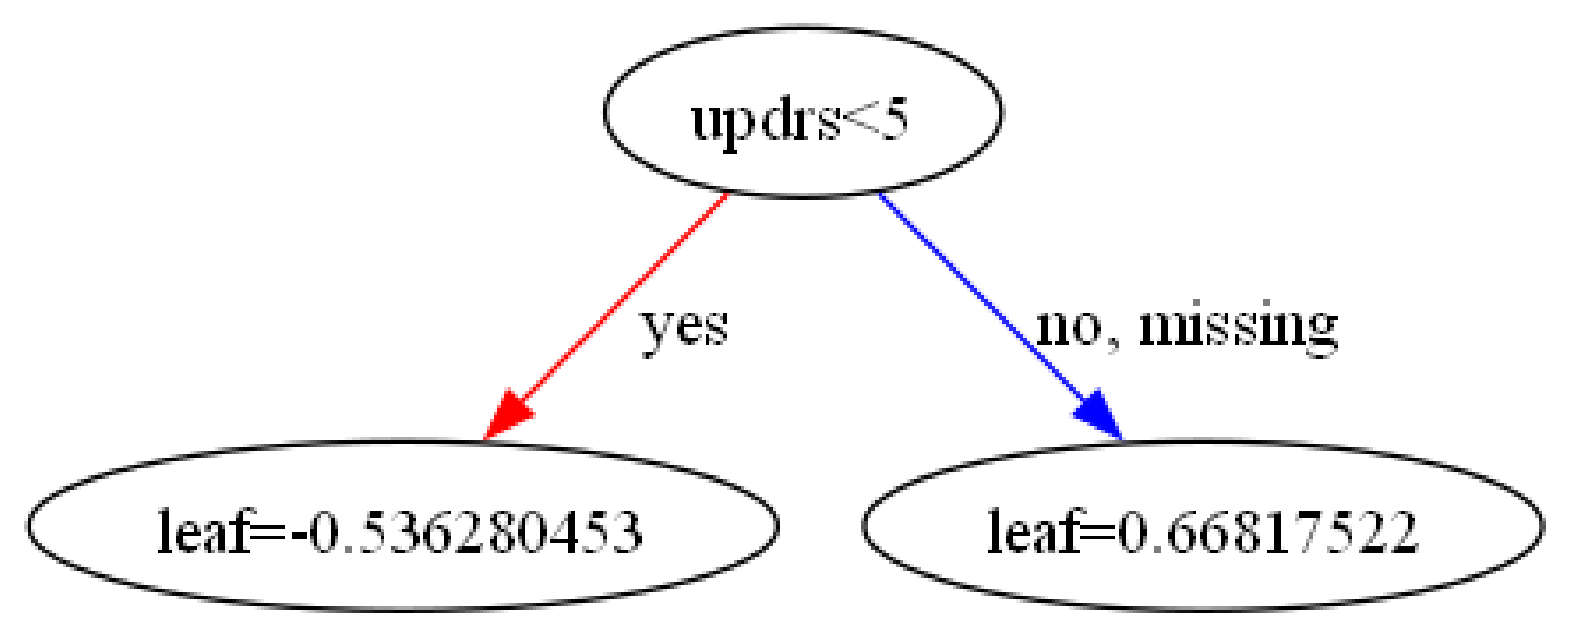

In [45]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import xgboost as xgb

plt.figure(figsize=(30, 30))
xgb.plot_tree(XGB_classifier)

fig = plt.gcf()
fig.set_size_inches(20, 15)

plt.show()

## Support Vector Machine

In [10]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
data4 = data.copy()
data4 = data4.drop(['subject_id'], axis = 1)

### Linear

In [12]:
X = data4.drop(['class_information'], axis = 1)
y = data4['class_information']

X_train, X_test, y_train, y_test21 = train_test_split(X, y, test_size = 0.2, random_state = 45)

SVM_classifier = SVC(random_state=45, kernel = 'linear')

SVM_classifier.fit(X_train, y_train)

y_pred21 = SVM_classifier.predict(X_test)

accuracy = accuracy_score(y_test21, y_pred21)
print(f'Accuracy of the SVM Classifier: {accuracy:.2f}')


Accuracy of the SVM Classifier: 1.00


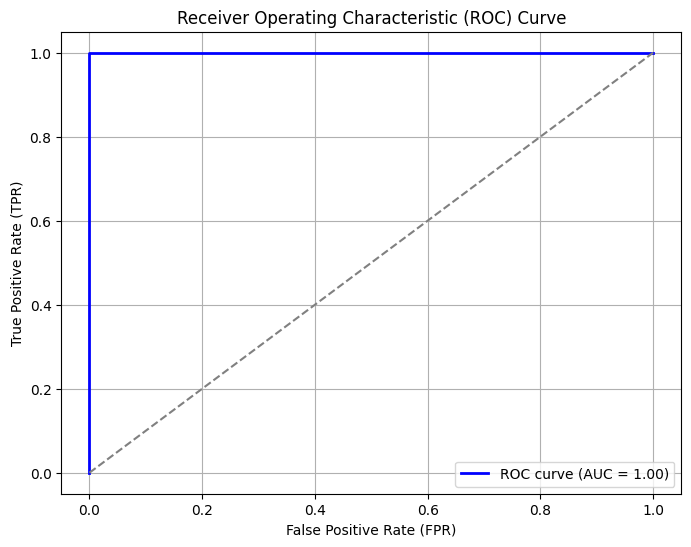

In [13]:
fpr, tpr, thresholds = roc_curve(y_test21, y_pred21)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


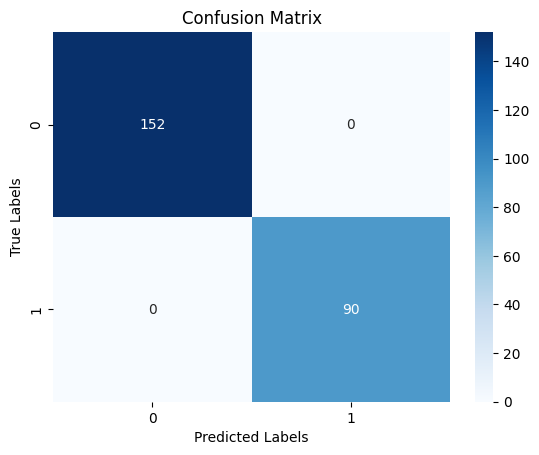

Confusion Matrix:
 [[152   0]
 [  0  90]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       152
         1.0       1.00      1.00      1.00        90

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



In [14]:
conf_matrix = confusion_matrix(y_test21, y_pred21)


sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
class_report = classification_report(y_test21, y_pred21)
print("Classification Report:\n", class_report)

### Polynomial

In [15]:
X = data4.drop(['class_information'], axis = 1)
y = data4['class_information']
X_train, X_test, y_train, y_test22 = train_test_split(X, y, test_size = 0.2, random_state = 45)

SVM_classifier = SVC(random_state=45, kernel = 'poly')

SVM_classifier.fit(X_train, y_train)

y_pred22 = SVM_classifier.predict(X_test)

accuracy = accuracy_score(y_test22, y_pred22)
print(f'Accuracy of the SVM Classifier: {accuracy:.2f}')


Accuracy of the SVM Classifier: 0.83


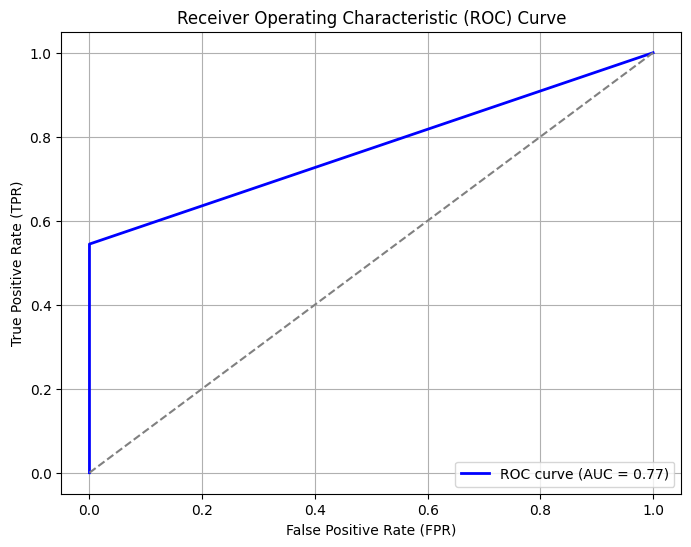

In [16]:
fpr, tpr, thresholds = roc_curve(y_test22, y_pred22)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


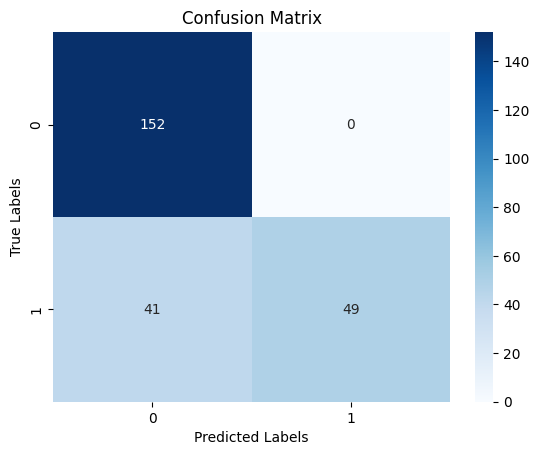

Confusion Matrix:
 [[152   0]
 [ 41  49]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      1.00      0.88       152
         1.0       1.00      0.54      0.71        90

    accuracy                           0.83       242
   macro avg       0.89      0.77      0.79       242
weighted avg       0.87      0.83      0.82       242



In [17]:
conf_matrix = confusion_matrix(y_test22, y_pred22)


sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
class_report = classification_report(y_test22, y_pred22)
print("Classification Report:\n", class_report)

### Radial Basis Function

In [18]:
X = data4.drop(['class_information'], axis = 1)
y = data4['class_information']
X_train, X_test, y_train, y_test23 = train_test_split(X, y, test_size = 0.2, random_state = 45)

SVM_classifier = SVC(random_state=45, kernel = 'rbf')

SVM_classifier.fit(X_train, y_train)

y_pred23 = SVM_classifier.predict(X_test)

accuracy = accuracy_score(y_test23, y_pred23)
print(f'Accuracy of the SVM Classifier: {accuracy:.2f}')


Accuracy of the SVM Classifier: 0.87


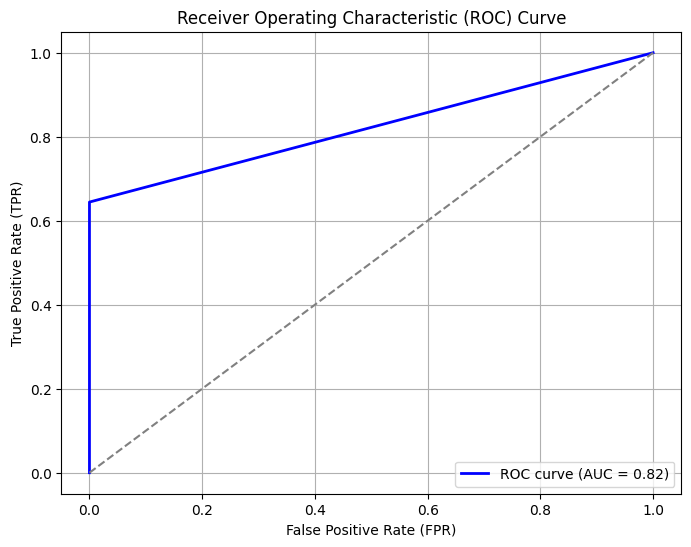

In [19]:
fpr, tpr, thresholds = roc_curve(y_test23, y_pred23)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

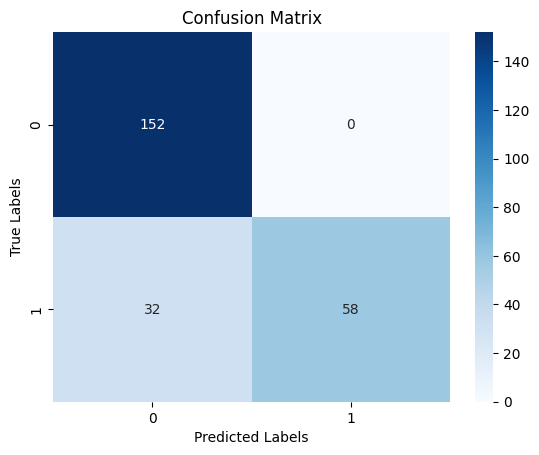

Confusion Matrix:
 [[152   0]
 [ 32  58]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      1.00      0.90       152
         1.0       1.00      0.64      0.78        90

    accuracy                           0.87       242
   macro avg       0.91      0.82      0.84       242
weighted avg       0.89      0.87      0.86       242



In [20]:
conf_matrix = confusion_matrix(y_test23, y_pred23)


sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
class_report = classification_report(y_test23, y_pred23)
print("Classification Report:\n", class_report)

### Sigmoid Kernel

In [21]:
X = data4.drop(['class_information'], axis = 1)
y = data4['class_information']
X_train, X_test, y_train, y_test24 = train_test_split(X, y, test_size = 0.2, random_state = 45)

SVM_classifier = SVC(random_state=45, kernel = 'sigmoid')

SVM_classifier.fit(X_train, y_train)

y_pred24 = SVM_classifier.predict(X_test)

accuracy = accuracy_score(y_test24, y_pred24)
print(f'Accuracy of the SVM Classifier: {accuracy:.2f}')


Accuracy of the SVM Classifier: 0.51


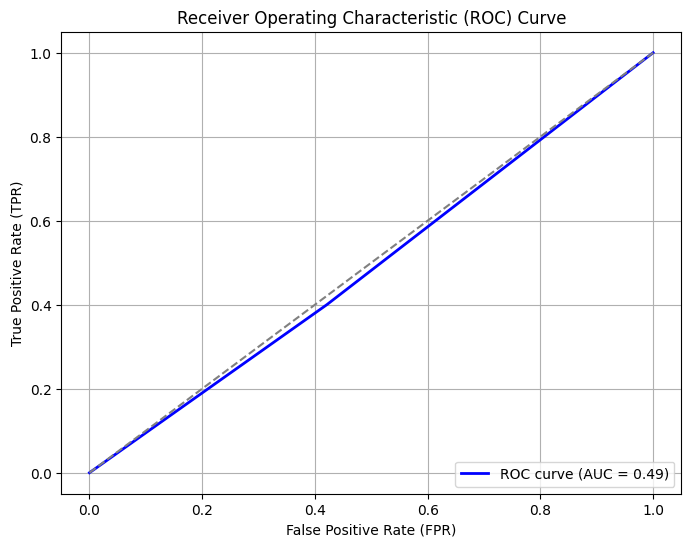

In [22]:
fpr, tpr, thresholds = roc_curve(y_test24, y_pred24)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


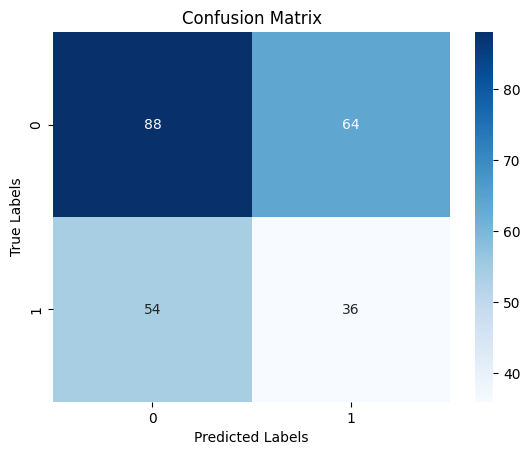

Confusion Matrix:
 [[88 64]
 [54 36]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.62      0.58      0.60       152
         1.0       0.36      0.40      0.38        90

    accuracy                           0.51       242
   macro avg       0.49      0.49      0.49       242
weighted avg       0.52      0.51      0.52       242



In [23]:
conf_matrix = confusion_matrix(y_test24, y_pred24)


sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
class_report = classification_report(y_test24, y_pred24)
print("Classification Report:\n", class_report)

## Random Forest

In [24]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [25]:
data4 = data.copy()
data4 = data4.drop(['subject_id'], axis = 1)

### GINI Index

In [26]:
X = data4.drop(['class_information'], axis = 1)
y = data4['class_information']

X_train, X_test, y_train, y_test31 = train_test_split(X, y, test_size = 0.2, random_state = 45)

RF_Classifier = RandomForestClassifier(n_estimators = 100, random_state = 45, criterion='gini', max_depth = 2)

RF_Classifier.fit(X_train, y_train)

y_pred31 = RF_Classifier.predict(X_test)

accuracy = accuracy_score(y_test31, y_pred31)
print(f'Accuracy of the Random Forest Classifier: {accuracy:.2f}')

Accuracy of the Random Forest Classifier: 0.97


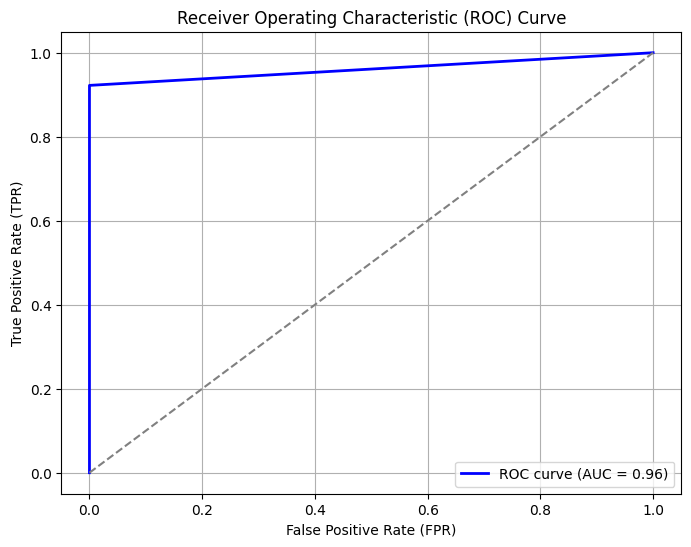

In [27]:
fpr, tpr, thresholds = roc_curve(y_test31, y_pred31)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


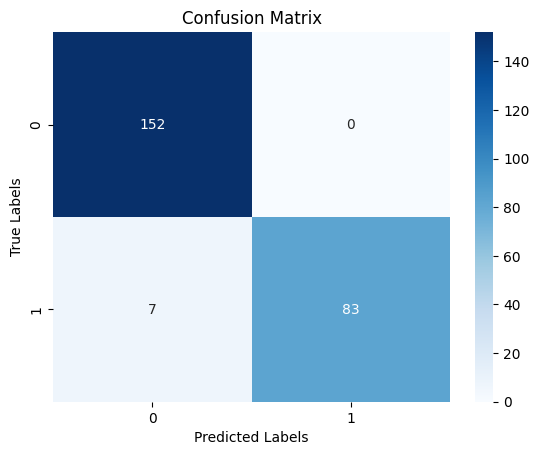

Confusion Matrix:
 [[152   0]
 [  7  83]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       152
         1.0       1.00      0.92      0.96        90

    accuracy                           0.97       242
   macro avg       0.98      0.96      0.97       242
weighted avg       0.97      0.97      0.97       242



In [28]:
conf_matrix = confusion_matrix(y_test31, y_pred31)


sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
class_report = classification_report(y_test31, y_pred31)
print("Classification Report:\n", class_report)

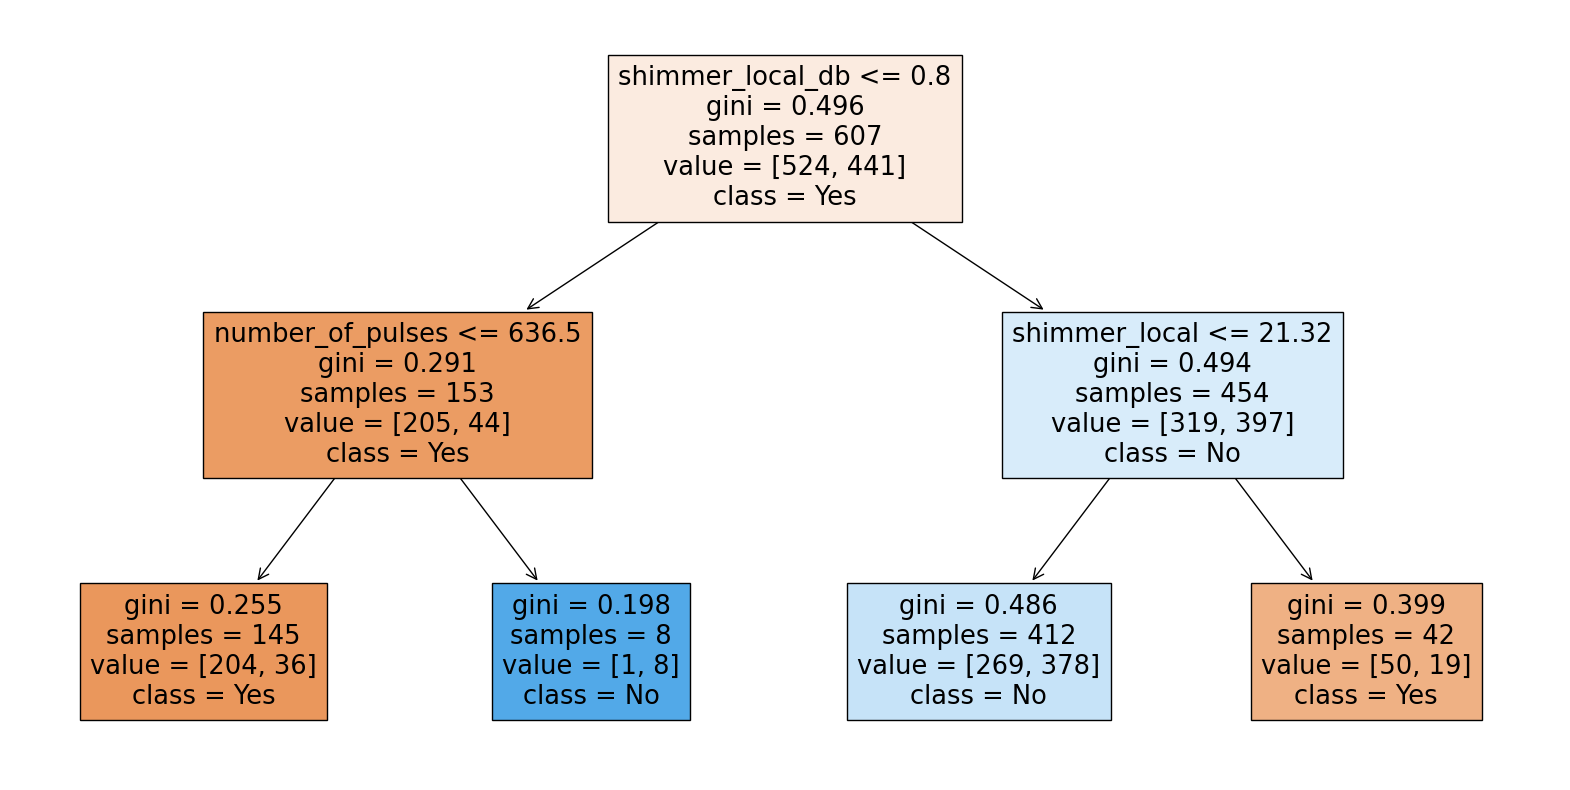

In [29]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(RF_Classifier.estimators_[0], feature_names = data4.columns, class_names = ['Yes', 'No'], filled = True)
plt.show()

### Entropy

In [30]:
X = data4.drop(['class_information'], axis = 1)
y = data4['class_information']
X_train, X_test, y_train, y_test32 = train_test_split(X, y, test_size = 0.2, random_state = 45)

RF_Classifier = RandomForestClassifier(n_estimators = 100, random_state = 45, criterion='entropy' , max_depth = 2)

RF_Classifier.fit(X_train, y_train)

y_pred32 = RF_Classifier.predict(X_test)

accuracy = accuracy_score(y_test32, y_pred32)
print(f'Accuracy of the Random Forest Classifier: {accuracy:.2f}')

Accuracy of the Random Forest Classifier: 0.97


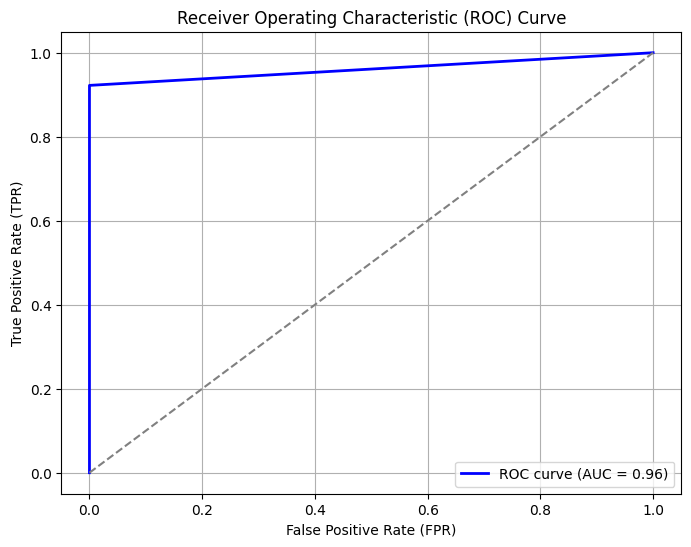

In [31]:
fpr, tpr, thresholds = roc_curve(y_test32, y_pred32)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


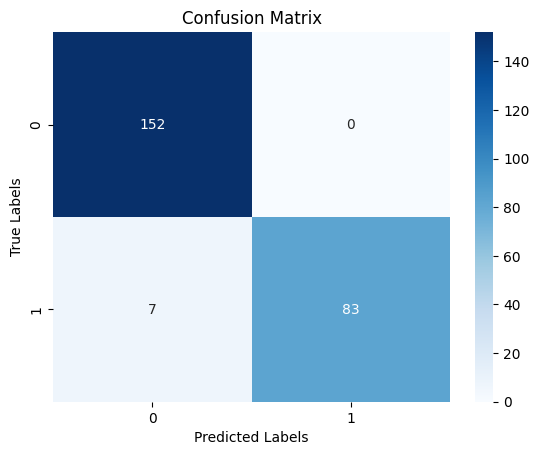

Confusion Matrix:
 [[152   0]
 [  7  83]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       152
         1.0       1.00      0.92      0.96        90

    accuracy                           0.97       242
   macro avg       0.98      0.96      0.97       242
weighted avg       0.97      0.97      0.97       242



In [32]:
conf_matrix = confusion_matrix(y_test32, y_pred32)


sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
class_report = classification_report(y_test32, y_pred32)
print("Classification Report:\n", class_report)

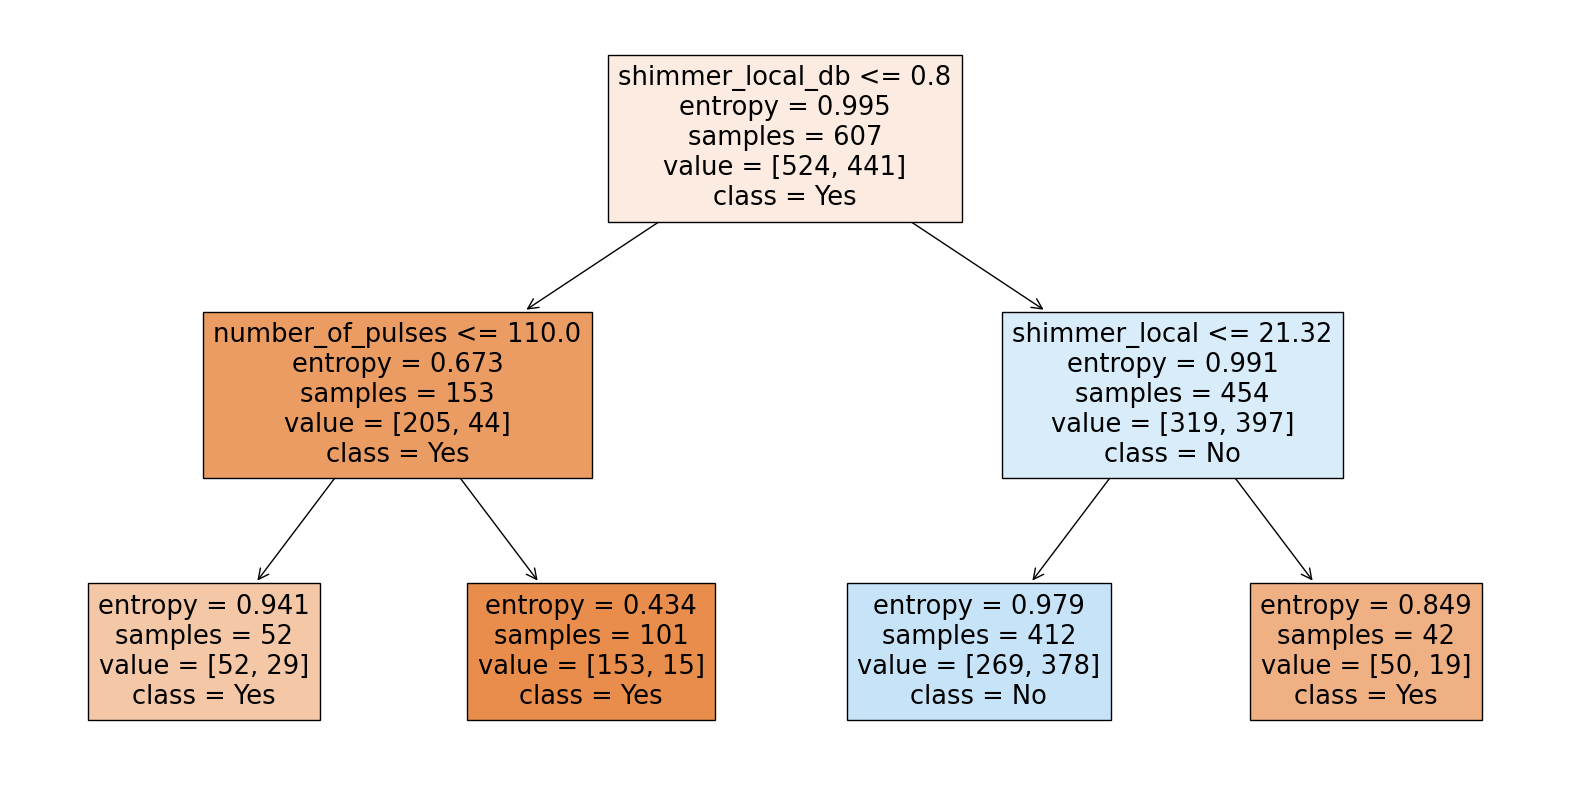

In [33]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(RF_Classifier.estimators_[0], feature_names = data4.columns, class_names = ['Yes', 'No'], filled = True)
plt.show()

## Naive Bayes

In [34]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [35]:
data4 = data.copy()
data4 = data4.drop(['subject_id'], axis = 1)

In [36]:
X = data4.drop(['class_information'], axis = 1)
y = data4['class_information']

scaler = StandardScaler()

X_train, X_test, y_train, y_test4 = train_test_split(X, y, test_size = 0.2, random_state = 45)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Naive_Bayes_classifier = GaussianNB()

Naive_Bayes_classifier.fit(X_train, y_train)

y_pred4 = Naive_Bayes_classifier.predict(X_test)

accuracy = accuracy_score(y_test4, y_pred4)
print(f'Accuracy of the XGBoost Classifier: {accuracy:.2f}')

Accuracy of the XGBoost Classifier: 1.00


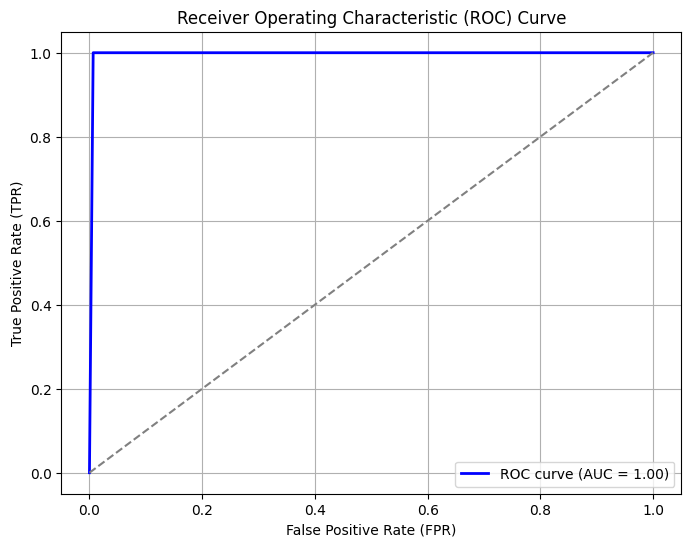

In [37]:
fpr, tpr, thresholds = roc_curve(y_test4, y_pred4)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


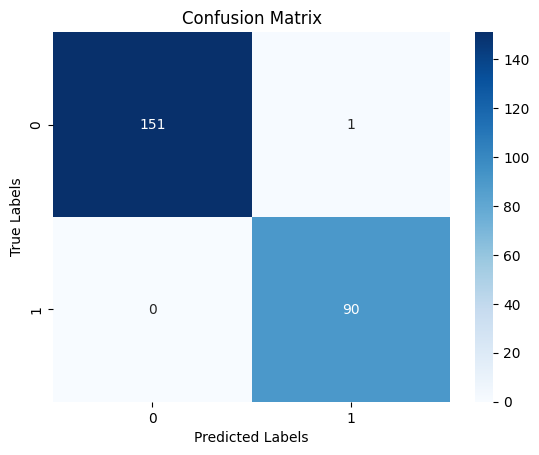

Confusion Matrix:
 [[151   1]
 [  0  90]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       152
         1.0       0.99      1.00      0.99        90

    accuracy                           1.00       242
   macro avg       0.99      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



In [38]:
conf_matrix = confusion_matrix(y_test4, y_pred4)


sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
class_report = classification_report(y_test4, y_pred4)
print("Classification Report:\n", class_report)

## KNN

In [39]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [40]:
data4 = data.copy()
data4 = data4.drop(['subject_id'], axis = 1)

In [41]:
X = data4.drop(['class_information'], axis = 1)
y = data4['class_information']

scaler = StandardScaler()

X_train, X_test, y_train, y_test5 = train_test_split(X, y, test_size = 0.2, random_state = 45)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_classifier = KNeighborsClassifier(n_neighbors=3)

knn_classifier.fit(X_train_scaled, y_train)

y_pred5 = knn_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test5, y_pred5)
print(f'Accuracy of the KNN Classifier: {accuracy:.2f}')

Accuracy of the KNN Classifier: 0.91


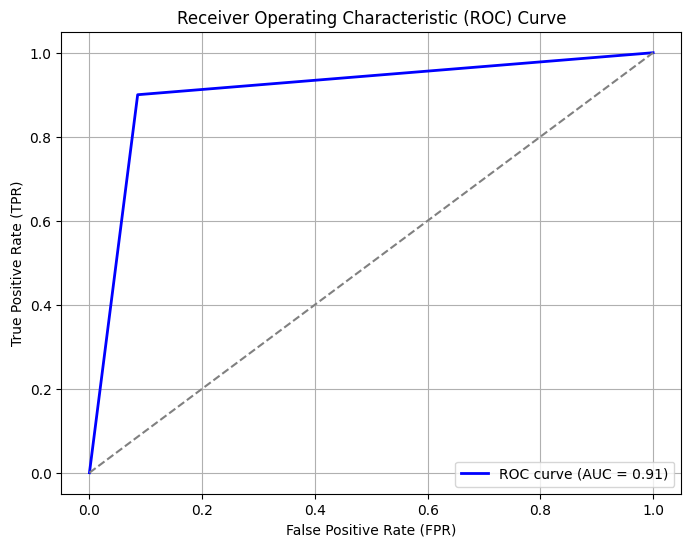

In [42]:
fpr, tpr, thresholds = roc_curve(y_test5, y_pred5)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


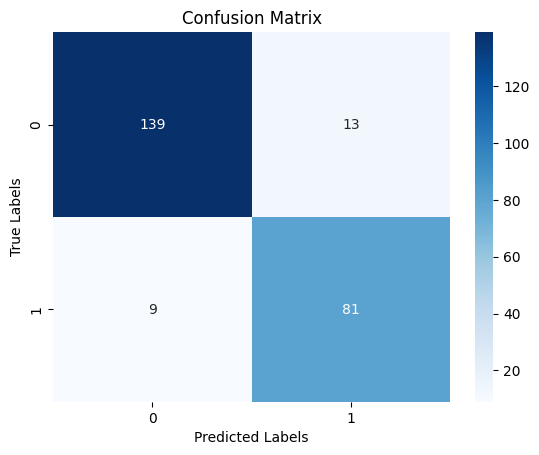

Confusion Matrix:
 [[139  13]
 [  9  81]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.91      0.93       152
         1.0       0.86      0.90      0.88        90

    accuracy                           0.91       242
   macro avg       0.90      0.91      0.90       242
weighted avg       0.91      0.91      0.91       242



In [43]:
conf_matrix = confusion_matrix(y_test5, y_pred5)


sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
class_report = classification_report(y_test5, y_pred5)
print("Classification Report:\n", class_report)

# Combined analaysis

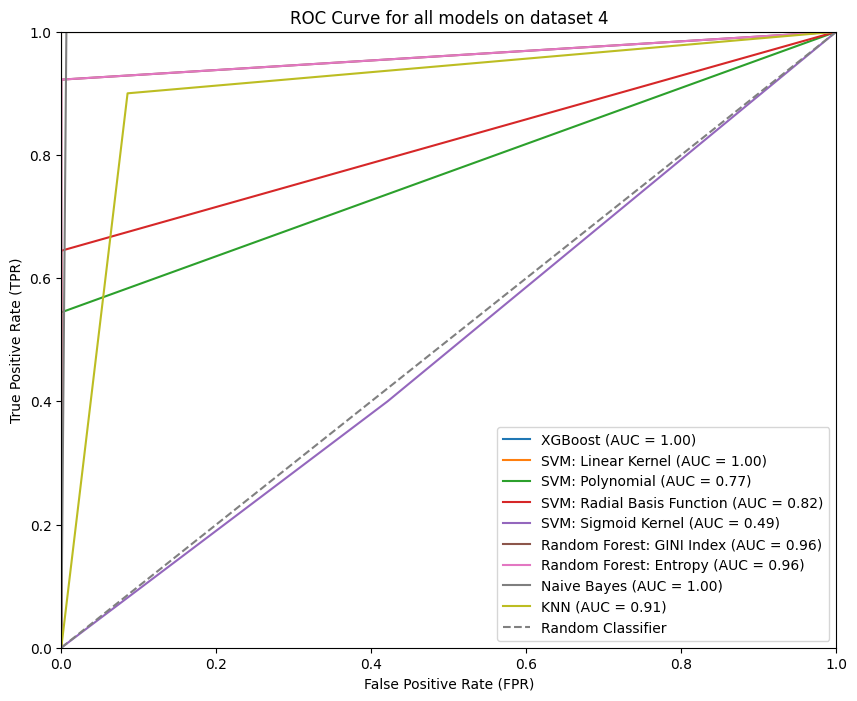

In [44]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr1, tpr1, _ = roc_curve(y_test1, y_pred1)
roc_auc1 = auc(fpr1, tpr1)

fpr21, tpr21, _ = roc_curve(y_test21, y_pred21)
roc_auc21 = auc(fpr21, tpr21)

fpr22, tpr22, _ = roc_curve(y_test22, y_pred22)
roc_auc22 = auc(fpr22, tpr22)

fpr23, tpr23, _ = roc_curve(y_test23, y_pred23)
roc_auc23 = auc(fpr23, tpr23)

fpr24, tpr24, _ = roc_curve(y_test24, y_pred24)
roc_auc24 = auc(fpr24, tpr24)

fpr31, tpr31, _ = roc_curve(y_test31, y_pred31)
roc_auc31 = auc(fpr31, tpr31)

fpr32, tpr32, _ = roc_curve(y_test32, y_pred32)
roc_auc32 = auc(fpr32, tpr32)

fpr4, tpr4, _ = roc_curve(y_test4, y_pred4)
roc_auc4 = auc(fpr4, tpr4)

fpr5, tpr5, _ = roc_curve(y_test5, y_pred5)
roc_auc5 = auc(fpr5, tpr5)

plt.figure(figsize=(10, 8))
plt.plot(fpr1, tpr1, label=f'XGBoost (AUC = {roc_auc1:.2f})')
plt.plot(fpr21, tpr21, label=f'SVM: Linear Kernel (AUC = {roc_auc21:.2f})')
plt.plot(fpr22, tpr22, label=f'SVM: Polynomial (AUC = {roc_auc22:.2f})')
plt.plot(fpr23, tpr23, label=f'SVM: Radial Basis Function (AUC = {roc_auc23:.2f})')
plt.plot(fpr24, tpr24, label=f'SVM: Sigmoid Kernel (AUC = {roc_auc24:.2f})')
plt.plot(fpr31, tpr31, label=f'Random Forest: GINI Index (AUC = {roc_auc31:.2f})')
plt.plot(fpr32, tpr32, label=f'Random Forest: Entropy (AUC = {roc_auc32:.2f})')
plt.plot(fpr4, tpr4, label=f'Naive Bayes (AUC = {roc_auc4:.2f})')
plt.plot(fpr5, tpr5, label=f'KNN (AUC = {roc_auc5:.2f})')


plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for all models on dataset 4')
plt.legend(loc='lower right')
plt.show()